In [41]:
import sklearn
import os
import matplotlib as mpl
import urllib

In [42]:
datapath = os.path.join('datasets', 'lifesat', '')
datapath

'datasets\\lifesat\\'

In [43]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# 전체적인 글로벌 폰트 사이즈 설정

In [49]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"

os.makedirs(datapath, exist_ok=True)
# exist_ok=True : 기존에 파일이 존재한다면 오류를 예외처리 시키는 작업

for filename in ('oecd_bli_2015.csv', 'gdp_per_capita.csv'):
    print("Downloading", filename)
    
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    print(url)
    
    urllib.request.urlretrieve(url, datapath + filename)
    # 파일 다운로드 함수
    
# Downloading oecd_bli_2015.csv
# https://raw.githubusercontent.com/rickiepark/handson-ml2/master/datasets/lifesat/oecd_bli_2015.csv
# Downloading gdp_per_capita.csv
# https://raw.githubusercontent.com/rickiepark/handson-ml2/master/datasets/lifesat/gdp_per_capita.csv

https://raw.githubusercontent.com/rickiepark/handson-ml2/master/datasets/lifesat/oecd_bli_2015.csv
https://raw.githubusercontent.com/rickiepark/handson-ml2/master/datasets/lifesat/gdp_per_capita.csv


In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [51]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.10,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.00,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.00,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.20,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.90,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3287,EST,Estonia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.43,NaN,NaN
3288,ISR,Israel,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.24,E,Estimated value
3289,RUS,Russia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.75,E,Estimated value
3290,SVN,Slovenia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.12,NaN,NaN


In [52]:
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",
                             thousands=',', # 쉼표 제거
                             delimiter='\t',
                             encoding='latin1',
                             na_values="n/a") # 값이 없을 경우 n/a
gdp_per_capita.head(10)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0
5,Argentina,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13588.846,2013.0
6,Armenia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3534.860,2014.0
7,Australia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50961.865,2014.0
8,Austria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43724.031,2015.0
9,Azerbaijan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",5739.433,2014.0


In [55]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli.head(5)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [56]:
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(5)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


In [57]:
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.head(5)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [59]:
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head(5)

KeyError: "None of ['Country'] are in the columns"

In [67]:
full_country_stats = pd.merge(left=oecd_bli,
                              right=gdp_per_capita,
                              left_index=True,
                              right_index=True)
full_country_stats.head(5)

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,14.41,93.0,91.0,19.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50961.865,2014.0
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,14.46,75.0,94.0,17.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43724.031,2015.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,15.71,89.0,87.0,18.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",40106.632,2014.0
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,14.25,61.0,91.0,17.2,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43331.961,2015.0


In [68]:
full_country_stats.sort_values(by="GDP per capita",
                               inplace=True)
full_country_stats.head(5)

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0


In [71]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
# 제거할 칼럼 지정

keep_indices = list(set(range(36)) - set(remove_indices))
# 리스트 형태로 지정 후, 지정한 칼럼을 삭제하는 작업

keep_indices

[2,
 3,
 4,
 5,
 7,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32]

In [79]:
country_stats = full_country_stats[["GDP per capita",
                                    'Life satisfaction']].iloc[keep_indices]
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


In [81]:
import numpy as np

a = np.array([1, 2, 3])
print('a = ', a)
# 기본적으로 1차원 구조

print('np.c_ = ', np.c_[a])
# numpy를 통해 2차원으로 변형

a =  [1 2 3]
np.c_ =  [[1]
 [2]
 [3]]


In [82]:
X = np.c_[country_stats["GDP per capita"]]
X
# y = wx + b에서 독립 변수인 x를 뜻함

array([[ 9054.914],
       [ 9437.372],
       [12239.894],
       [12495.334],
       [15991.736],
       [17288.083],
       [18064.288],
       [19121.592],
       [20732.482],
       [25864.721],
       [27195.197],
       [29866.581],
       [32485.545],
       [35343.336],
       [37044.891],
       [37675.006],
       [40106.632],
       [40996.511],
       [41973.988],
       [43331.961],
       [43603.115],
       [43724.031],
       [43770.688],
       [49866.266],
       [50854.583],
       [50961.865],
       [51350.744],
       [52114.165],
       [55805.204]])

In [83]:
y = np.c_[country_stats["Life satisfaction"]]
y
# y = wx + b에서 종속 변수인 y를 뜻함

array([[6. ],
       [5.6],
       [4.9],
       [5.8],
       [6.1],
       [5.6],
       [4.8],
       [5.1],
       [5.7],
       [6.5],
       [5.8],
       [6. ],
       [5.9],
       [7.4],
       [7.3],
       [6.5],
       [6.9],
       [7. ],
       [7.4],
       [7.3],
       [7.3],
       [6.9],
       [6.8],
       [7.2],
       [7.5],
       [7.3],
       [7. ],
       [7.5],
       [7.2]])

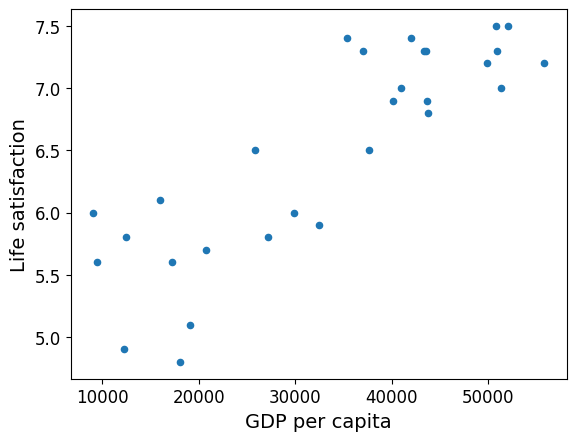

In [258]:
# 데이터 시각화
country_stats.plot(kind='scatter',
                   x="GDP per capita",
                   y='Life satisfaction')
plt.show()

In [85]:
model = sklearn.linear_model.LinearRegression()
# 선형 모델 선택, 선형 회귀 모델
# 지도 학습으로 분류된 모델

model.fit(X, y)
# 모델 훈련
# X : 학습 데이터 (GDP)
# y : 정답 데이터 (삶의 만족도)

X_new = [[22587]]
# 키프로스 1인 당 GDP

print(model.predict(X_new))
# 키프로스에 대한 예측 출력

# 1인 당 GDP가 22587이었을 때, 삶의 만족도는 [[5.96242338]]

[[5.96242338]]


In [96]:
X_new2 = [[9054.914]]

print(model.predict(X_new2))

print('Russia 정확도 :', model.predict(X_new2) / 6.0 * 100)

[[5.29778894]]
Russia 정확도 : [[88.29648231]]


In [100]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

In [104]:
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [108]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [110]:
boston.data.shape

(506, 13)

In [112]:
boston.data[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [114]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [116]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [117]:
boston.target.shape

(506,)

In [118]:
boston.target[0:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [121]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX
# 독립 변수 (학습 데이터)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [122]:
dfy = pd.DataFrame(boston.target, columns=['MEDV'])
dfy
# 타겟이 되는 label (정답 데이터)

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [125]:
df = pd.concat([dfX, dfy], axis=1)
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [129]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)
# split : 훈련 데이터와 검증 데이터를 나눠주는 함수
# test_size=0.3 : 30%를 검증 데이터로 지정
# random_state=0 : seed 값을 0으로 지정해서 랜덤한 난수를 0에 저장
# 결론 : 무작위로 추출한 데이터에서의 70%, 30%를 나누는 것

df_train.shape, df_test.shape
# ((354, 14), (152, 14))
# 506 * 0.7 = 354.2 / 506 * 0.3 = 151.8
# 14 = 칼럼의 개수

((354, 14), (152, 14))

In [130]:
dfX_train, dfX_test, dfy_train, dfy_test = train_test_split(dfX,
                                                            dfy,
                                                            test_size=0.3,
                                                            random_state=0)

dfX_train.shape, dfy_train.shape, dfX_test.shape, dfy_test.shape
# ((354, 13), (354, 1), (152, 13), (152, 1))
# x축에 대해 506 * 0.7 = 354.2 / 506 * 0.3 = 151.8 -> 13개의 칼럼
# y축에 대해 506 * 0.7 = 354.2 / 506 * 0.3 = 151.8 -> 1개의 칼럼 

((354, 13), (354, 1), (152, 13), (152, 1))

In [131]:
from sklearn.model_selection import KFold
import statsmodels.api as sm
import numpy as np

In [132]:
scores = np.zeros(5)
scores

array([0., 0., 0., 0., 0.])

In [133]:
cv = KFold(5, shuffle=True, random_state=0)
cv
# KFold(n_splits=5, random_state=0, shuffle=True)

KFold(n_splits=5, random_state=0, shuffle=True)

In [140]:
for i, (idx_train, idx_test) in enumerate(cv.split(df)):
# enumerate() : for문을 돌릴 때, 해당하는 값의 인덱스 번호도 자동으로 매기면서 루프 실행
    df_train = df.iloc[idx_train]
    df_test = df.iloc[idx_test]
    
    model = sm.OLS.from_formula('MEDV ~ ' + '+'.join(boston.feature_names),
                                data=df_train)
    # formula식 : 정답 ~ 독립 변수 + 독립 변수 + …
    
    result = model.fit()
    # 학습이 끝난 모델
    
    pred = result.predict(df_test)
    
    rss = ((df_test.MEDV - pred) ** 2).sum()
    # RSS (Residual Sum of Squares) : 오차의 크기를 뜻함
    
    tss = ((df_test.MEDV - df_test.MEDV.mean()) ** 2).sum()
    # TSS (Total Sum of Squares) : 종속 변수 값의 움직임의 범위
    
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

학습 R2 = 0.77301356, 검증 R2 = 0.58922238
학습 R2 = 0.72917058, 검증 R2 = 0.77799144
학습 R2 = 0.74897081, 검증 R2 = 0.66791979
학습 R2 = 0.75658611, 검증 R2 = 0.66801630
학습 R2 = 0.70497483, 검증 R2 = 0.83953317


In [162]:
for i, (idx_train, idx_test) in enumerate(cv.split(df_train)):
# enumerate() : for문을 돌릴 때, 해당하는 값의 인덱스 번호도 자동으로 매기면서 루프 실행
    df_train = df.iloc[idx_train]
    df_test = df.iloc[idx_test]
    
    model = sm.OLS.from_formula('MEDV ~ ' + '+'.join(boston.feature_names),
                                data=df_train)
    # formula식 : 정답 ~ 독립 변수 + 독립 변수 + …
    
    result = model.fit()
    # 학습이 끝난 모델
    
    pred = result.predict(df_test)
    # 학습이 끝난 모델을 결과를 통해 예측 실시
    
    rss = ((df_test.MEDV - pred) ** 2).sum()
    # RSS (Residual Sum of Squares) : 오차의 크기를 뜻함
    
    tss = ((df_test.MEDV - df_test.MEDV.mean()) ** 2).sum()
    # TSS (Total Sum of Squares) : 종속 변수 값의 움직임의 범위
    
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

학습 R2 = 0.76155366, 검증 R2 = 0.56111044
학습 R2 = 0.74383327, 검증 R2 = 0.66495466
학습 R2 = 0.73884717, 검증 R2 = 0.70288546
학습 R2 = 0.72252621, 검증 R2 = 0.77432972
학습 R2 = 0.72756596, 검증 R2 = 0.74686193


In [167]:
from sklearn.model_selection import KFold
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import r2_score

scores = np.zeros(5)

cv = KFold(5, shuffle=True, random_state=0)

for i, (idx_train, idx_test) in enumerate(cv.split(df)):
    df_train = df.iloc[idx_train]
    df_test = df.iloc[idx_test]
    
    model = sm.OLS.from_formula('MEDV ~ ' + '+'.join(boston.feature_names),
                                data=df_train)
    
    result = model.fit()
    
    pred = result.predict(df_test)
    
    rsquared = r2_score(df_test.MEDV, pred)
    # 검증 식을 만드는 함수
    # = 결정 계수를 구하는 함수

    scores[i] = rsquared # 검증 결과 차례로 저장
    
scores # 검증 결과 출력

array([0.58922238, 0.77799144, 0.66791979, 0.6680163 , 0.83953317])

In [182]:
from sklearn.base import BaseEstimator, RegressorMixin
import statsmodels.formula.api as smf
import statsmodels.api as sm

class StatsmodelsOLS(BaseEstimator, RegressorMixin):
# 부모(라이브러리)로부터 BaseEstimator, RegressorMixin를 받아옴
    def __init__(self, formula):
        self.formula = formula
        self.model = None
        self.data = None
        self.result = None
     
    def fit(self, dfX, dfy):
        self.data = pd.concat([dfX, dfy], axis=1)
        self.model = smf.ols(self.formula, data=self.data)
        # ols() : 선형 회귀 모델 사용
        self.result = self.model.fit()
        # 학습이 끝난 모델 객체를 result에 담기
    
    def predict(self, new_data):
        return self.result.predict(new_data)

from sklearn.model_selection import cross_val_score

model = StatsmodelsOLS("MEDV ~ " + "+".join(boston.feature_names))

cv = KFold(5, shuffle=True, random_state=0)

cross_val_score(model, dfX, dfy, scoring="r2", cv=cv)
# 검증 결과 출력 / 측정한 결정 계수를 사용해서 출력
# 사용할 하이퍼파라미터 모델(model) + 학습 데이터(dfX) + 정답 데이터(dfy) + 결정 계수(r2) + K-Fold(cv)

array([0.58922238, 0.77799144, 0.66791979, 0.6680163 , 0.83953317])

In [191]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

data = load_iris()

In [193]:
data.keys()
# dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [195]:
data.data.shape
# (150, 4)

(150, 4)

In [196]:
data.target.shape
# (150,)

(150,)

In [199]:
data.target[0:10]
# array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [202]:
data.target[50:60]
# array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [203]:
data.target[100:110]
# array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [198]:
data.target_names
# array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [206]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [208]:
iris = pd.DataFrame(data=data.data, columns=data.feature_names)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [210]:
target = pd.Series(data.target, dtype='category')
target
# 0 : Iris-Setosa / 1 : Iris-Versicolour / 2 : Iris-Virginica

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: category
Categories (3, int64): [0, 1, 2]

In [212]:
target = target.cat.rename_categories(data.target_names)
target
# 해당 카테고리의 숫자를 이름으로 지정

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [214]:
iris["species"] = target
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [216]:
iris.rename({"sepal length (cm)":"sepal_length",
             "sepal width (cm)": "sepal_width",
             "petal length (cm)":"petal_length",
             "petal width (cm)":"petal_width"},
             axis=1,
             inplace=True)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [220]:
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:, :-1], # 위치 정보로 slice
                                                    iris.iloc[:, -1], # 위치 정보로 slice
                                                    test_size=0.33, # 3분의 1을 테스트로
                                                    random_state=42)
X_train, X_test, y_train, y_test

(     sepal_length  sepal_width  petal_length  petal_width
 96            5.7          2.9           4.2          1.3
 105           7.6          3.0           6.6          2.1
 66            5.6          3.0           4.5          1.5
 0             5.1          3.5           1.4          0.2
 122           7.7          2.8           6.7          2.0
 ..            ...          ...           ...          ...
 71            6.1          2.8           4.0          1.3
 106           4.9          2.5           4.5          1.7
 14            5.8          4.0           1.2          0.2
 92            5.8          2.6           4.0          1.2
 102           7.1          3.0           5.9          2.1
 
 [100 rows x 4 columns],
      sepal_length  sepal_width  petal_length  petal_width
 73            6.1          2.8           4.7          1.2
 18            5.7          3.8           1.7          0.3
 118           7.7          2.6           6.9          2.3
 78            6.0          2

In [222]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# ((100, 4), (50, 4), (100,), (50,))

((100, 4), (50, 4), (100,), (50,))

In [225]:
model = DecisionTreeClassifier(criterion="gini",
                               splitter="best",
                               max_depth=None,
                               min_samples_split=2,
                               min_samples_leaf=1,
                               min_weight_fraction_leaf=0.0,
                               max_features=None,
                               random_state=42,
                               max_leaf_nodes=None,
                               min_impurity_decrease=0.0,
                               class_weight=None)
# 의사 결정 트리 (하이퍼파라미터에 사용될 값들)

model
# DecisionTreeClassifier(random_state=42)

DecisionTreeClassifier(random_state=42)

In [239]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

s_results = cross_val_score(model, X_train, y_train, cv=cv)
# scoring이 없다면 기본으로 결정 계수인 r2가 지정됨

s_results
# array([0.9, 0.9, 0.8, 0.9, 1. , 1. , 0.9, 0.8, 1. , 1. ]) 총 10개

array([0.9, 0.9, 0.8, 0.9, 1. , 1. , 0.9, 0.8, 1. , 1. ])

In [245]:
fin_result = np.mean(s_results)
fin_result
# 0.9199999999999999

0.9199999999999999

In [246]:
for i, _ in enumerate(s_results):
# _ : 의미 없는 변수
    print("{}번째 교차검증 정확도: {}".format(i, _))

print("교차검증 최종 정확도: {}".format(fin_result))

0번째 교차검증 정확도: 0.9
1번째 교차검증 정확도: 0.9
2번째 교차검증 정확도: 0.8
3번째 교차검증 정확도: 0.9
4번째 교차검증 정확도: 1.0
5번째 교차검증 정확도: 1.0
6번째 교차검증 정확도: 0.9
7번째 교차검증 정확도: 0.8
8번째 교차검증 정확도: 1.0
9번째 교차검증 정확도: 1.0
교차검증 최종 정확도: 0.9199999999999999


In [242]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)

results = cross_val_score(model, X_train, y_train, cv=cv)
# scoring이 없다면 기본으로 결정 계수인 r2가 지정됨

results
# array([0.9, 1. , 0.8, 1. , 0.8, 0.9, 1. , 0.9, 1. , 1. ]) 총 10개

array([0.9, 1. , 0.8, 1. , 0.8, 0.9, 1. , 0.9, 1. , 1. ])

In [247]:
fin_result = np.mean(results)
fin_result
# 0.93

0.93

In [249]:
for i, _ in enumerate(results):
# _ : 의미 없는 변수
    print("{}번째 교차검증 정확도: {}".format(i, _))

print("교차검증 최종 정확도: {}".format(fin_result))

0번째 교차검증 정확도: 0.9
1번째 교차검증 정확도: 1.0
2번째 교차검증 정확도: 0.8
3번째 교차검증 정확도: 1.0
4번째 교차검증 정확도: 0.8
5번째 교차검증 정확도: 0.9
6번째 교차검증 정확도: 1.0
7번째 교차검증 정확도: 0.9
8번째 교차검증 정확도: 1.0
9번째 교차검증 정확도: 1.0
교차검증 최종 정확도: 0.93


In [257]:
cv = KFold(n_splits=10, shuffle=True, random_state=4)

results = cross_val_score(model, X_train, y_train, cv=cv)
# scoring이 없다면 기본으로 결정 계수인 r2가 지정됨

results
# array([0.9, 1. , 0.8, 1. , 0.8, 0.9, 1. , 0.9, 1. , 1. ]) 총 10개

fin_result = np.mean(results)
fin_result
# 0.93

for i, _ in enumerate(results):
# _ : 의미 없는 변수
    print("{}번째 교차검증 정확도: {}".format(i, _))

print("교차검증 최종 정확도: {}".format(fin_result))

0번째 교차검증 정확도: 0.8
1번째 교차검증 정확도: 1.0
2번째 교차검증 정확도: 1.0
3번째 교차검증 정확도: 0.9
4번째 교차검증 정확도: 1.0
5번째 교차검증 정확도: 0.8
6번째 교차검증 정확도: 0.9
7번째 교차검증 정확도: 0.9
8번째 교차검증 정확도: 1.0
9번째 교차검증 정확도: 1.0
교차검증 최종 정확도: 0.93
